In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

#### regplot

3.3104117915950175e-81


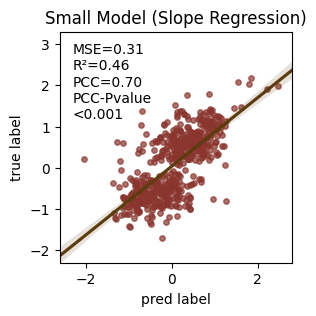

In [2]:
# load datasets
y_true = np.load('../model/pred_results_slope/small/label.npy')
y_pred = np.load('../model/pred_results_slope/small/predict.npy')

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]
print(pcc_pvalue)

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.6, 2.8))
plt.ylim((-2.3, 3.3))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.15,y_jitter = 0.15,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Small Model (Slope Regression)')

plt.text(-2.3,1.2,'MSE=%.2f\nR²=%.2f\nPCC=%.2f\nPCC-Pvalue\n<0.001'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

1.2319761302225124e-75


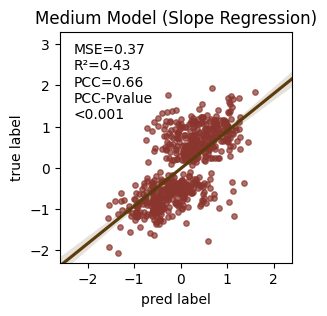

In [4]:
# load datasets
y_true = np.load('../model/pred_results_slope/middle/label.npy')[0:600]
y_pred = np.load('../model/pred_results_slope/middle/predict.npy')[0:600]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]
print(pcc_pvalue)

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.6, 2.4))
plt.ylim((-2.3, 3.3))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.1,y_jitter = 0.1,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Medium Model (Slope Regression)')
plt.text(-2.3,1.2,'MSE=%.2f\nR²=%.2f\nPCC=%.2f\nPCC-Pvalue\n<0.001'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-middle.png',dpi=300, bbox_inches = 'tight')
plt.show()

1.4539661159348197e-66


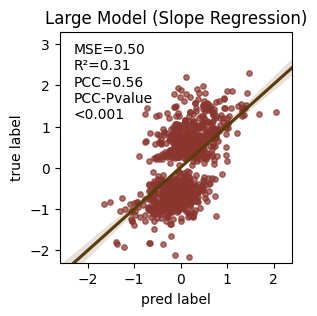

In [11]:
# load datasets
y_true = np.load('../model/pred_results_slope/large/label.npy')[0:800]
y_pred = np.load('../model/pred_results_slope/large/predict.npy')[0:800]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]
print(pcc_pvalue)

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.6, 2.4))
plt.ylim((-2.3, 3.3))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.1,y_jitter = 0.1,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Large Model (Slope Regression)')
plt.text(-2.3,1.2,'MSE=%.2f\nR²=%.2f\nPCC=%.2f\nPCC-Pvalue\n<0.001'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

7.90690564974177e-12


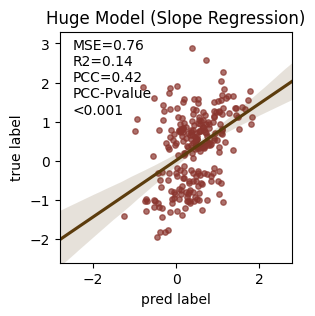

In [27]:
# load datasets
y_true = np.load('../model/pred_results_slope/huge/label.npy')
y_pred = np.load('../model/pred_results_slope/huge/predict.npy')
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]
print(pcc_pvalue)

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.8, 2.8))
plt.ylim((-2.6, 3.3))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.1,y_jitter = 0.1 ,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Huge Model (Slope Regression)')
plt.text(-2.5,1.2,'MSE=%.2f\nR2=%.2f\nPCC=%.2f\nPCC-Pvalue\n<0.001'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-huge.png',dpi=300, bbox_inches = 'tight')
plt.show()

#### raincloud

In [2]:
import matplotlib.collections as clt
import ptitprince as pt
import scipy.stats as stats

3.565454323211763e-06
2.683089599907963e-16


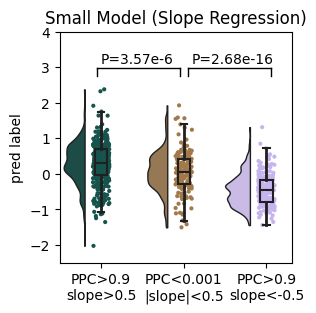

In [29]:
y_up = np.load('../model/pred_results_slope_compare_up/small/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/small/predict.npy')
y = np.load('../model/pred_results_slope_compare/small/predict.npy')

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.5
y_min=-2.3

pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'])[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'],df_down['score'])[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2.5, 4))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=3.57e-6',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=2.68e-16',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PPC>0.9\nslope>0.5','PPC<0.001\n|slope|<0.5','PPC>0.9\nslope<-0.5'])
plt.title('Small Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

5.480512373235385e-13
7.672883468901007e-28


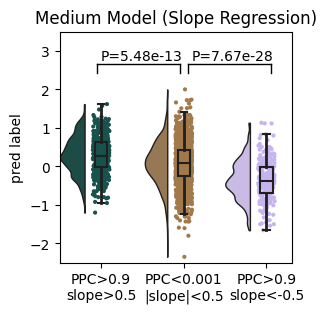

In [5]:
y_up = np.load('../model/pred_results_slope_compare_up/middle/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/middle/predict.npy')
y = np.load('../model/pred_results_slope_compare/middle/predict.npy')

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.2
y_min=-2.3
pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'].dropna())[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'].dropna(),df_down['score'].dropna())[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2.5, 3.5))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=5.48e-13',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=7.67e-28',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PPC>0.9\nslope>0.5','PPC<0.001\n|slope|<0.5','PPC>0.9\nslope<-0.5'])
plt.title('Medium Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-middle.png',dpi=300, bbox_inches = 'tight')
plt.show()

4.91017306713501e-07
5.732300346641504e-25


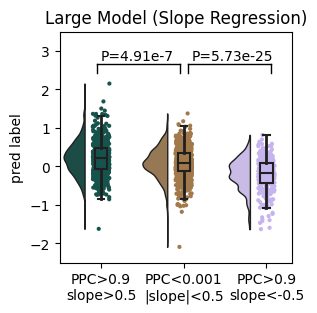

In [8]:
y_up = np.load('../model/pred_results_slope_compare_up/large/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/large/predict.npy')
y = np.load('../model/pred_results_slope_compare/large/predict.npy')

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.2
y_min=-2.3
pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'].dropna())[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'].dropna(),df_down['score'].dropna())[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2.5, 3.5))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=4.91e-7',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=5.73e-25',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PPC>0.9\nslope>0.5','PPC<0.001\n|slope|<0.5','PPC>0.9\nslope<-0.5'])
plt.title('Large Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

6.218233735658556e-05
3.490204340830705e-06


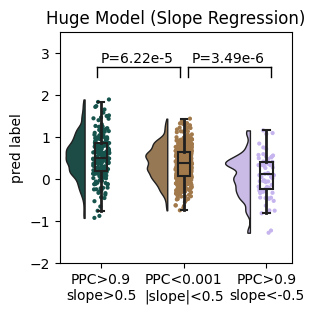

In [9]:
y_up = np.load('../model/pred_results_slope_compare_up/huge/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/huge/predict.npy')
y = np.load('../model/pred_results_slope_compare/huge/predict.npy')

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.2
y_min=-2.3
pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'].dropna())[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'].dropna(),df_down['score'].dropna())[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2, 3.5))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=6.22e-5',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=3.49e-6',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PPC>0.9\nslope>0.5','PPC<0.001\n|slope|<0.5','PPC>0.9\nslope<-0.5'])
plt.title('Huge Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-huge.png',dpi=300, bbox_inches = 'tight')
plt.show()

#### extreme cases analysis of non-casual variants

In [2]:
import pandas as pd
import numpy as np

# query: https://genebe.net/variant/hg38/chr1-2212052-G-A
# query: https://www.ebi.ac.uk/gwas/studies/GCST006414

test_data = pd.read_pickle('../datasets/non_causal/small/test_small.pkl')[['phenotype_id','variant_id','slope']]
test_data['pred'] = 0.0
test_data['gene'] = ''
test_data['rsid'] = ''
test_data['gwas'] = ''
#print(test_data.head())
y = np.load('../model/pred_results_slope_compare/small/predict.npy')
for i in range(len(test_data)):
    test_data['pred'][i] = y[i]
#print(test_data.head())

df_sorted = test_data.reindex(test_data["pred"].abs().sort_values(ascending=False).index)[0:10]
df_sorted["variant_id"] = df_sorted["variant_id"].apply(lambda x: x.replace("_", "-", 2).replace("_", "-", 1).replace("_", "-", 1))
print(df_sorted)
df_sorted.to_csv('../datasets/non_causal/small_top10cases.csv',index=False)

           phenotype_id               variant_id     slope      pred gene  \
28    ENSG00000258331.1   chr12-43154835-G-A-b38 -0.206199  1.923004        
64   ENSG00000162585.16     chr1-2212052-G-A-b38 -0.129694  1.582201        
98   ENSG00000179954.15   chr19-55489125-C-T-b38 -0.154189  1.560385        
18    ENSG00000135144.7  chr12-113055887-C-G-b38  0.267133  1.543695        
83   ENSG00000125648.14    chr19-6465963-G-T-b38 -0.116617 -1.507745        
9     ENSG00000182118.7   chr1-231039400-C-T-b38  0.311840 -1.422010        
133  ENSG00000184840.11   chr5-177593031-G-A-b38 -0.179175  1.387981        
14    ENSG00000184207.8    chr16-2215270-C-T-b38 -0.218211 -1.316269        
107   ENSG00000250420.8   chr5-178818950-T-C-b38 -0.391919  1.296552        
13    ENSG00000105649.9   chr19-18204386-G-A-b38 -0.152666  1.238080        

    rsid gwas  
28             
64             
98             
18             
83             
9              
133            
14             
107     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18928\3175392861.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'][i] = y[i]


In [3]:
import pandas as pd
import numpy as np

test_data = pd.read_pickle('../datasets/non_causal/middle/test_middle.pkl')[['phenotype_id','variant_id','slope']]
test_data['pred'] = 0.0
test_data['gene'] = ''
test_data['rsid'] = ''
test_data['gwas'] = ''
#print(test_data.head())
y = np.load('../model/pred_results_slope_compare/middle/predict.npy')
for i in range(len(test_data)):
    test_data['pred'][i] = y[i]
#print(test_data.head())

df_sorted = test_data.reindex(test_data["pred"].abs().sort_values(ascending=False).index)[0:10]
df_sorted["variant_id"] = df_sorted["variant_id"].apply(lambda x: x.replace("_", "-", 2).replace("_", "-", 1).replace("_", "-", 1))
print(df_sorted)
df_sorted.to_csv('../datasets/non_causal/middle_top10cases.csv',index=False)

            phenotype_id              variant_id     slope      pred gene  \
688   ENSG00000172650.13  chr10-73689749-T-C-b38 -0.112645 -2.350849        
192    ENSG00000248184.1   chr4-54324726-C-G-b38  0.292784  1.998418        
362   ENSG00000163872.15  chr3-183706159-G-T-b38 -0.088079 -1.802606        
1206   ENSG00000116176.6   chr16-1218494-C-T-b38 -0.229735  1.732145        
1255  ENSG00000196683.10   chr7-22816987-C-T-b38 -0.372236  1.720744        
703    ENSG00000133937.4  chr14-94765008-C-G-b38  0.375251  1.718410        
448   ENSG00000105137.12  chr19-15098078-C-T-b38  0.080510  1.659904        
668   ENSG00000157103.10   chr3-10984214-G-C-b38 -0.240971  1.632822        
1333   ENSG00000180089.5  chr19-55222442-C-T-b38  0.374625 -1.605358        
1144   ENSG00000214491.8  chr22-30537574-A-G-b38  0.438249 -1.592348        

     rsid gwas  
688             
192             
362             
1206            
1255            
703             
448             
668             

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18928\3195254409.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'][i] = y[i]


In [4]:
import pandas as pd
import numpy as np

test_data = pd.read_pickle('../datasets/non_causal/large/test_large.pkl')[['phenotype_id','variant_id','slope']]
test_data['pred'] = 0.0
test_data['gene'] = ''
test_data['rsid'] = ''
test_data['gwas'] = ''
#print(test_data.head())
y = np.load('../model/pred_results_slope_compare/large/predict.npy')
for i in range(800):
    test_data['pred'][i] = y[i]
#print(test_data.head())

df_sorted = test_data.reindex(test_data["pred"].abs().sort_values(ascending=False).index)[0:10]
df_sorted["variant_id"] = df_sorted["variant_id"].apply(lambda x: x.replace("_", "-", 2).replace("_", "-", 1).replace("_", "-", 1))
print(df_sorted)
df_sorted.to_csv('../datasets/non_causal/large_top10cases.csv',index=False)

           phenotype_id              variant_id     slope      pred gene rsid  \
130  ENSG00000143303.11  chr1-156808053-G-T-b38  0.142982 -2.092526             
48    ENSG00000091542.8  chr17-18248297-C-A-b38  0.281092  1.373457             
31   ENSG00000162591.15    chr1-3527468-G-A-b38 -0.159817 -1.181048             
432   ENSG00000271952.1   chr2-10803291-G-A-b38  0.434112  1.171301             
616   ENSG00000125851.9  chr20-17160461-C-G-b38  0.330304  1.094106             
794  ENSG00000006047.12   chr17-7229843-G-A-b38 -0.231276  1.073022             
771  ENSG00000176783.14  chr5-179610465-C-T-b38 -0.169571  1.057142             
297   ENSG00000232075.1  chr10-63577393-T-C-b38 -0.322166 -1.038830             
701   ENSG00000181029.8   chr19-7693839-G-A-b38  0.281440  1.030030             
519   ENSG00000038002.8  chr4-177541457-C-T-b38 -0.454322 -1.024575             

    gwas  
130       
48        
31        
432       
616       
794       
771       
297       
701      

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18928\4121889075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'][i] = y[i]


In [5]:
import pandas as pd
import numpy as np

test_data = pd.read_pickle('../datasets/non_causal/huge/test_huge.pkl')[['phenotype_id','variant_id','slope']]
test_data['pred'] = 0.0
test_data['gene'] = ''
test_data['rsid'] = ''
test_data['gwas'] = ''
#print(test_data.head())
y = np.load('../model/pred_results_slope_compare/huge/predict.npy')
for i in range(500):
    test_data['pred'][i] = y[i]
#print(test_data.head())

df_sorted = test_data.reindex(test_data["pred"].abs().sort_values(ascending=False).index)[0:10]
df_sorted["variant_id"] = df_sorted["variant_id"].apply(lambda x: x.replace("_", "-", 2).replace("_", "-", 1).replace("_", "-", 1))
print(df_sorted)
df_sorted.to_csv('../datasets/non_causal/huge_top10cases.csv',index=False)

           phenotype_id              variant_id     slope      pred gene rsid  \
79   ENSG00000196975.15   chr2-69793638-C-T-b38  0.153509  1.426819             
323  ENSG00000011028.13  chr17-62507871-A-G-b38 -0.048678  1.360881             
8     ENSG00000214617.9  chr16-32406031-A-T-b38  0.185626  1.346671             
168  ENSG00000115310.17   chr2-55000239-C-G-b38  0.127002  1.320445             
16   ENSG00000064995.16   chr6-34673093-C-T-b38 -0.294735  1.314407             
147   ENSG00000169047.5  chr2-226665728-C-T-b38 -0.069745  1.302541             
190  ENSG00000161847.13  chr19-10473621-G-A-b38  0.121298  1.269782             
284  ENSG00000196220.15    chr3-9498639-C-T-b38  0.375574  1.262310             
6     ENSG00000169951.9  chr16-30457569-T-C-b38  0.205624  1.214066             
280   ENSG00000163933.9   chr3-52994359-C-T-b38  0.479893  1.212680             

    gwas  
79        
323       
8         
168       
16        
147       
190       
284       
6        

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18928\1429327247.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'][i] = y[i]
